In [1]:
from google.colab import files
import zipfile
import pandas as pd
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Allow file upload
uploaded = files.upload()

# Step 2: Extract the ZIP File
import os

zip_filename = list(uploaded.keys())[0]  # Get uploaded file name
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)


Saving archive(2).zip to archive(2).zip
Files extracted to: /content/dataset


In [3]:
color_data_path = os.path.join(extract_path, "input/wiki-color-list.text")

# Load the color data
color_data = pd.read_csv(
    color_data_path,
    sep="\t",
    skiprows=1,  # Skip header line
    names=[
        "Index", "Name", "Hex", "Red", "Green", "Blue",
        "Hue", "Saturation", "Lightness", "Sat2", "Value", "W3C Name"
    ]
)

In [4]:
# Clean and preview the data
color_data = color_data.drop(columns=["Index", "Sat2"]).dropna()
print("Color Data Sample:")
print(color_data.head())

# Step 4: Function to Detect Dominant Color in an Image
def get_dominant_color(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize for faster processing
    resized_image = cv2.resize(image, (150, 150))
    data = resized_image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(data)

    # Get the dominant color
    dominant_color = kmeans.cluster_centers_[0]
    return tuple(map(int, dominant_color))


Color Data Sample:
       Name           Hex   Red   Green   Blue    Hue Saturation Lightness  \
37    Name   Hex triplet   Red   Green   Blue    Hue      Satur     Light    
55   Black       #000000    0%      0%     0%      —         0%        0%    
64    Blue       #0000FF    0%      0%   100%   240°       100%       50%    
111   Name   Hex triplet   Red   Green   Blue    Hue      Satur     Light    
201   Cyan       #00FFFF    0%    100%   100%   180°       100%       50%    

      Value  W3C Name  
37   Value   W3C name  
55      0%      Black  
64    100%       Blue  
111  Value   W3C name  
201   100%       Cyan  


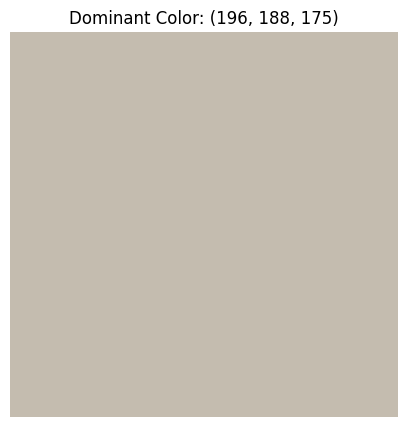

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to detect the dominant color
def get_dominant_color(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize for faster processing
    resized_image = cv2.resize(image, (150, 150))
    data = resized_image.reshape((-1, 3))

    # Apply K-Means clustering
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(data)

    # Get the dominant color
    dominant_color = kmeans.cluster_centers_[0]
    return tuple(map(int, dominant_color))

# Example usage
image_path = '/content/white.jpg'  # Update this with the actual path
dominant_color = get_dominant_color(image_path)

# Visualizing the dominant color
fig, ax = plt.subplots(figsize=(5, 5))
ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=np.array(dominant_color) / 255))
ax.set_title(f"Dominant Color: {dominant_color}", fontsize=12)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')  # Hide axes
plt.show()
